# Logistic Regression by Nadja Fejzic

February 2021

In the assignment, I used gradient ascent to find the weights for the logistic regression using the widely-used breast cancer data set described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin


## Step 1:  Getting, preprocessing, and understanding the dataset

### Importing the standard libraries

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
# Importing breast cancer dataset
from sklearn.datasets import load_breast_cancer
# Importing preprocessing from sklearn
from sklearn import preprocessing
# Importing train_test_split from sklearn to be able to split the sets
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Importing the dataset

In [ ]:
# Loading dataset to a variable cancer
cancer = load_breast_cancer()
print("This is the example of logistic regression using breast cancer dataset\n")
# Storing target to a variable called y
y = cancer.target
# Store feature to a variable called X
X = cancer.data

# Scaling
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

This is the example of logistic regression using breast cancer dataset



In [ ]:
# Printing the shape of data (X) and target (Y) values 
print("The shape of X --", X.shape)
print("The shape of Y --", y.shape)

The shape of X -- (569, 30)
The shape of Y -- (569,)


### Data Pre-Processing
#### Splitting the data into train and test before scaling the dataset


In [ ]:
# Using train_test_split() function to split the dataset - controls the shuffling applied to the data before applying the split and makes the split always the same 
# By specifying random state we make sure that split is fixed (eg. Data split is the same in every run)
# Storing the returned value to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21) 

#### Scale the data since we will be using gradient ascent

In [ ]:
# Finding the scaler of the dataset by using preprocessing.StandardScaler().fit()
# If a column is standardized, mean value of the column is subtracted from each value and then the values are divided by the standard deviation of the column. The resulting columns have a standard deviation of 1 and a mean that is very close to zero. Thus, we end up having variables (columns) that have almost a normal distribution.
# Using this scale to scale the X_train and X_test using .transform() - we only fit the training set and tranform the others
# Fitting the entire dataset to the standard scaler object causes the model to learn about test set which we don't want
# We have 30 different attributes and all the attributes have different scales
# Making sure each attributes has the equal impact on data
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

In [ ]:
# Printing the shape of the training set x_train and y_train 
print("\nThe shape of the training set: ")
print("X ------", X_train.shape) 
print("Y ------", y_train.shape) 


The shape of the training set: 
X ------ (426, 30)
Y ------ (426,)


#### Adding a column of ones to the  matrices $X_{train}$ and  $X_{test}$
After adding a column of ones $X_{train}=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$

Similarly for $X_{test}$

In [ ]:
# Appending a column of ones to x_train and X_test

# Creating a column vector of ones by using np.ones and reshape
training_vector = np.ones(shape= y_train.shape).reshape(-1,1)
# Appending the vector to the beginning of x_train by using np.hstack
X_train = np.hstack((training_vector, X_train))

# Doing the same for the test data
testing_vector = np.ones(shape=y_test.shape).reshape(-1,1)
X_test = np.hstack((testing_vector, X_test))

# We can check that everything worked correctly by:
# Printing out the new dimensions
print("\nThe new dimensions of data: ")
print("X train ------", X_train.shape) 
print("X test ------", X_test.shape) 

# Looking at the first two rows of X_train to check everything worked as expected
print(X_train[0:2])


The new dimensions of data: 
X train ------ (426, 31)
X test ------ (143, 31)
[[ 1.          1.54012613  0.91229211  1.52119391  1.47640466  0.33018764
   0.52038897  1.21532979  1.37174601  0.64760934 -0.56103238  0.74179351
   2.9376887   1.24596273  0.65483514  1.39973045  0.86583299  1.41899736
   3.66818714  0.86422218  0.92486089  0.94239329  0.77558863  1.03472391
   0.76015112 -0.3186253  -0.08183965  0.53114111  1.0337912  -0.52538349
  -0.43921564]
 [ 1.         -0.69222545  1.19852137 -0.64252731 -0.70672851  1.93852663
   0.96385359 -0.5480159  -0.09309424  1.16604331  1.59514339 -0.39510764
   1.38098164 -0.35051099 -0.42654888  1.94641928  0.52937796 -0.43912221
   0.95117524 -0.59840614  0.76750834 -0.68113375  1.06056527 -0.62970874
  -0.69065425  1.94769028  0.45060929 -0.63657612  0.24657612 -0.1581473
   0.87303092]]


### Understanding the dataset

In [ ]:
# Description of the dataset
print("\n", cancer.DESCR)
# Printing the names of all the features
print("The number of features is: ", X.shape[1])
print(cancer.feature_names, "\n")
print(cancer.keys(), "\n")


 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius,


 
### Sigmoid($z$)

sigmoid($z$) takes as input a column vector of real numbers, $z^T = [z_1, z_2, ..., z_{N'}]$, where $N'$ is the number of  examples

It should produce as output a column vector $\left[\frac{1}{1+e^{-z_1}},\frac{1}{1+e^{-z_2}},...,\frac{1}{1+e^{-z_{N'}}}\right]^T$

In [ ]:
# Writing the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Initializing ${\bf w}$
For testing the next functions, we create a coefficient vector, ${\bf w}$.
We will initialize the coeffients to be $0$, i.e. ${\bf w}^T = [0,0,\ldots ,0]$ (We could have initialized ${\bf w}$ to any values.)

In [ ]:
# Initializing w using np.zeros()
w = np.zeros((X_train.shape[1])) 
print("The shape of w: ", w.shape)

The shape of w:  (31,)


### Our hypothesis, $h({\bf x})$
The next  function to write is our hypothesis function. 

For example if our design matrix $X$ consists of single example $X=[1,x_1,x_2,\ldots,x_d]$ and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, it returns $h({\bf x})=\frac{1}{1+e^{-\left({w_{0}\cdot 1 +w_1\cdot x_1+\cdots w_d\cdot x_d}\right)}}$

If given a  matrix consisting of $N'$ examples 
$X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and  weights ${\bf w}^T=[w_0,w_2,\ldots, w_d]$, the function returns a column vector
$[h({\bf x}^{(1)}),h({\bf x}^{(2)},\ldots, h({\bf x}^{(N')}]^T$

In [ ]:
# Predicting the probability that a patient has cancer 
# Writing the hypothesis function 
def hypothesis(X , w):
    return sigmoid(np.dot(X, w))

### Log-Likelihood Function.
Calculating the log likelihood function $\ell({\bf w})=
\sum_{i=1}^{N'}y^{(i)}\ln(h({\bf x}^{(i)})) +(1- y^{(i)})\ln(1-h({\bf x}^{(i)}))$

The input is a matrix consisting of $N'$ examples $X=\left[\begin{matrix}
1& x^{(1)}_1& x^{(1)}_2 &\ldots& x^{(1)}_d\\
1& x^{(2)}_1& x^{(2)}_2 &\ldots& x^{(2)}_d\\
\vdots & \vdots &\vdots & & \vdots \\
1& x^{(N')}_1& x^{(N')}_2 &\ldots& x^{(N')}_d\\
\end{matrix}\right]$
and a column vector ${\bf y}^T=[y^{(1)},y^{(2)},\dots,y^{(N')}]$ of labels for $X$.

The output is $\ell({\bf w})$

In [ ]:
# Writing the log likelihood function 
def log_likelihood(X , y , w ):
    val = np.sum(y * np.log(hypothesis(X, w)) + (1 - y) * np.log(1 - hypothesis(X, w)))
    return val

# Gradient Ascent


In [ ]:
def Logistic_Regresion_Gradient_Ascent(X, y, learning_rate, num_iters):
    # Initializing log_likelihood to be an empty list
    log_likelihood_values = []  
    # Initializing w to be a zero vector of shape x_train.shape[1],1
    w = np.zeros((X_train.shape[1],1))
    # Initialize N to the number of training examples
    N = X.shape[0]
    # For every 100 iterations, storing the log_likelihood for the current w
    for i in range(num_iters):
        # Calculating the hypothesis and derivative
        h = hypothesis(X, w)
        derivative = 1/N * np.matmul(np.transpose(X), (y - h))
        # Calculating the update
        update = learning_rate * derivative
        # Updating w 
        w = w + update
        # Appending the log_likelihodd values to the list for every 100 iterations
        if (i % 100 == 0):
            log_likelihood_values.append(log_likelihood(X, y, w))
            
    return w, log_likelihood_values

In [ ]:
print(X_train.shape)
print(y_train.shape)
# Reshaping Y train
y_train = y_train.reshape(y_train.shape[0],1)
# Setting the learning_rate
learning_rate = 0.5
# Setting the num_iters
num_iters = 5000
# Running the Logistic_Regresion_Gradient_Ascent() and storing the returned values
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
print(w)
print(log_likelihood_values)

(426, 31)
(426,)
[[-0.97616379]
 [ 0.71728242]
 [ 0.17113221]
 [ 0.66254775]
 [ 0.1886061 ]
 [ 0.37175963]
 [ 2.12568488]
 [-2.30252242]
 [-2.11423871]
 [ 0.5618252 ]
 [-0.30298111]
 [-3.09861638]
 [ 0.16118323]
 [-1.77209556]
 [-2.64756391]
 [ 1.11770733]
 [ 0.83515656]
 [ 0.88529849]
 [ 0.18250726]
 [-0.56334676]
 [ 1.77643413]
 [-2.2138097 ]
 [-2.26723799]
 [-1.66351709]
 [-2.45124575]
 [-1.70484877]
 [ 0.83783358]
 [-1.87952408]
 [-1.8441974 ]
 [-0.69199867]
 [-1.66154804]]
[-102.60193784287699, -32.018923900701495, -28.48877971321679, -26.79720527020011, -25.715554411722096, -24.926798427385584, -24.30886855270296, -23.803235049780533, -23.377137492865472, -23.010057044190752, -22.68818987684395, -22.401872511970023, -22.144166667094918, -21.90997463921455, -21.69545924478112, -21.49766167037383, -21.314249310982156, -21.1433473716694, -20.983424010702556, -20.833210002039067, -20.691641100588917, -20.557815715356238, -20.43096317211197, -20.310419480133508, -20.195608533158705, -

# Plotting Likelihood v/s Number of Iterations.

Text(0.5, 0, 'Number of iterations')

Text(0, 0.5, 'Likelihood')

Text(0.5, 1.0, 'Likelihood vs Number of Iterations.')

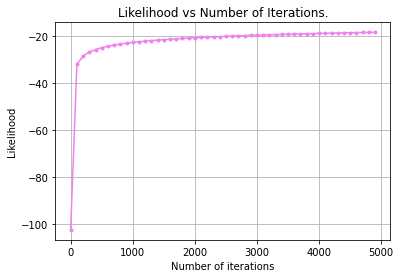

In [ ]:
# Running this cell to plot Likelihood v/s Number of Iterations.
iters = np.array(range(0,num_iters,100))
plt.plot(iters,log_likelihood_values,'.-',color='violet')
plt.xlabel('Number of iterations')
plt.ylabel('Likelihood')
plt.title("Likelihood vs Number of Iterations.")
plt.grid()

#  Evaluating your model

In [ ]:
# Using hypothesis(...) to predict.
threshold = 0.5
prediction_1 = hypothesis(X_test,w)
prediction_2 = prediction_1.reshape((prediction_1.shape[0]))
after_threshold = (prediction_2 >= threshold).astype(int)

In [ ]:
# Summarizing the efficiency of the program
def confusion_matrix(y_target, y_predicted):
  TP=0
  FP=0
  FN=0
  TN=0

  for i in range(y_test.shape[0]):
    # Predicting positive and it's true
    if ((y_target[i]) == 1 and (y_predicted[i] == 1)):
      TP += 1
    # Predicting positive and it's false
    elif ((y_target[i]) == 0 and (y_predicted[i] == 1)):
      FP += 1
    # Predicting negative and it's false 
    elif ((y_target[i]) == 1 and (y_predicted[i] == 0)):
      FN += 1
    # Predicting negative and it's true
    elif ((y_target[i]) == 0 and (y_predicted[i] == 0)):
      TN += 1

  # Out of all the positive classes we have predicted correctly, how many are actually positive
  precision = TP/(TP+FP)
  # Out of all the positive classes, how much we predicted correctly. It should be high as possible.
  recall = TP/(TP+FN)
  f1 = 2*(precision*recall)/(precision+recall)

  print("Precision: ",precision)
  print("Recall: ",recall)
  print("F1: ",f1)
  print("Confusion Matrix: ")
  print("TP: ",TP," FN: ",FN," FP: ",FP," TN: ",TN)


confusion_matrix(y_test, after_threshold)

Precision:  0.968421052631579
Recall:  0.989247311827957
F1:  0.9787234042553192
Confusion Matrix: 
TP:  92  FN:  1  FP:  3  TN:  47


In [ ]:
# Checking out different hyper-parameters for better Precision, Recall and F1 manually
threshold = 0.38
prediction_1 = hypothesis(X_test,w)
prediction_2 = prediction_1.reshape((prediction_1.shape[0]))
after_threshold = (prediction_2 >= threshold).astype(int)
# Setting the learning_rate
learning_rate = 0.8
# Setting the num_iters
num_iters = 100
# Running the Logistic_Regresion_Gradient_Ascent() and storing the returned values
w, log_likelihood_values = Logistic_Regresion_Gradient_Ascent(X_train, y_train, learning_rate, num_iters)
confusion_matrix(y_test, after_threshold)

Precision:  0.9587628865979382
Recall:  1.0
F1:  0.9789473684210526
Confusion Matrix: 
TP:  93  FN:  0  FP:  4  TN:  46


These are some better values for hyper-parameters found since recall is 1.0 and it should be as high as possible since it indicates how many predictions we made correctly. Precision also increased a bit.